In [1]:
#read data
tgc <- read.table("sup_table2.txt",header= TRUE)

In [2]:

library(ggplot2)
library(viridis)

Loading required package: viridisLite


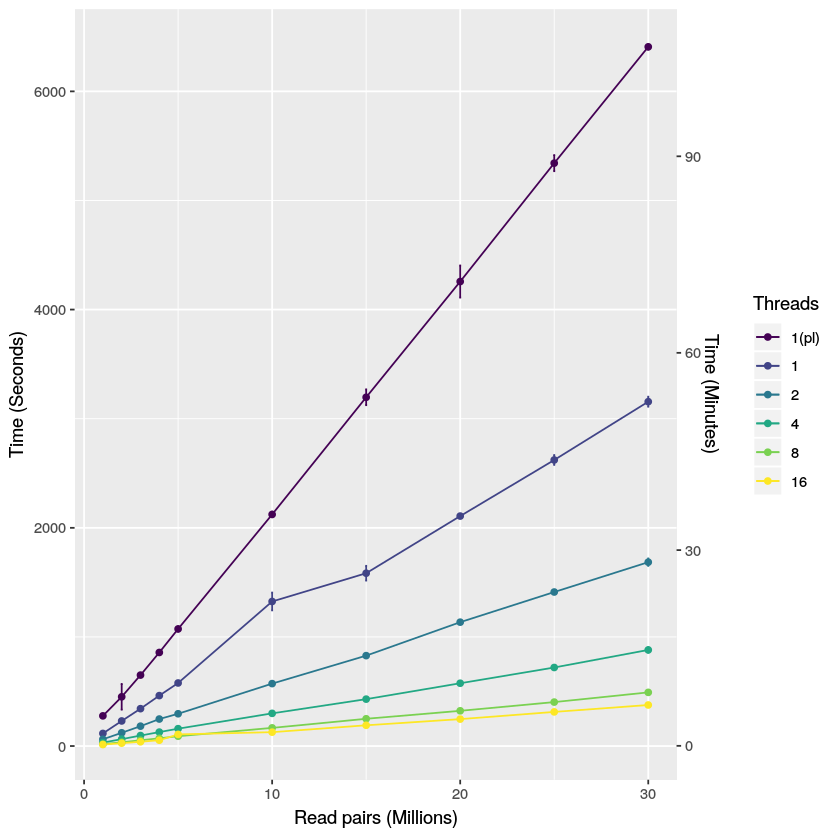

In [3]:
#ordering labels 
tgc$cores_labels <- factor(tgc$cores_labels, levels = c("1(pl)", "1", "2", "4", "8", "16"))
#plot figure
ggplot(tgc, aes(order=, x=size, y=times, colour=cores_labels)) + 
  geom_errorbar(aes(ymin=times-ci, ymax=times+ci), width=.1) +
  geom_line() + scale_color_manual(values=viridis(6)) +
  geom_point() +
  labs(colour="Threads",x="Read pairs (Millions)",y="Time (seconds)") +
  scale_y_continuous("Time (Seconds)", sec.axis = sec_axis(~./60, name = "Time (Minutes)")) +
  ggsave(filename = "figure1_temp.png", width = 12, height = 10, dpi = 1200)

In [4]:
library(magick)
library(magrittr)

Linking to ImageMagick 6.8.9.9
Enabled features: cairo, fontconfig, freetype, fftw, lcms, pango, rsvg, x11
Disabled features: ghostscript, webp


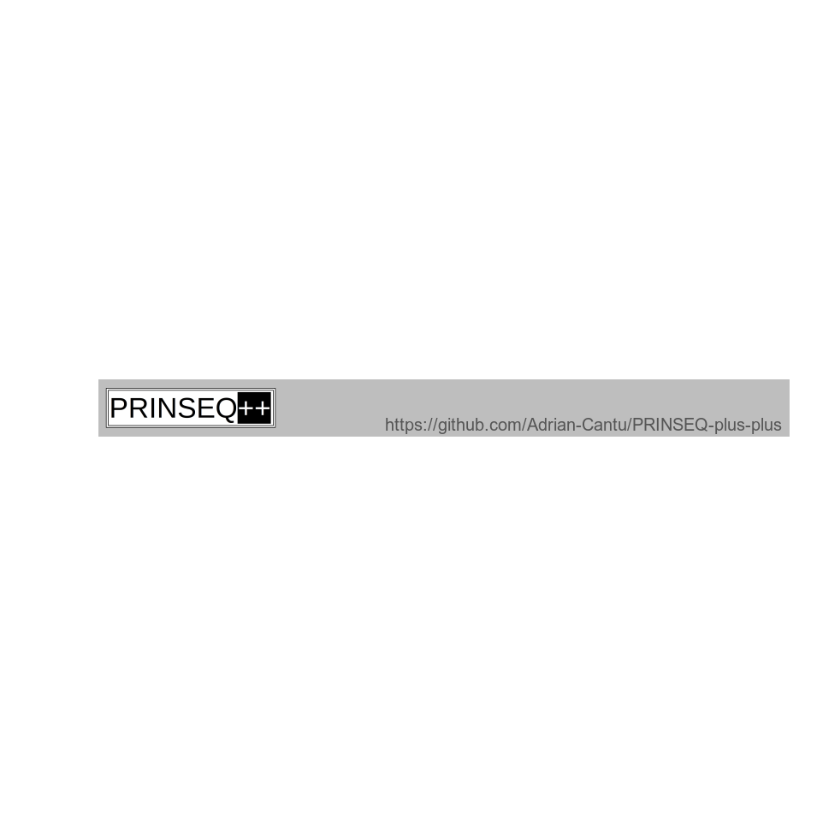

In [5]:
#download logo and add grey frame
logo_raw <- image_read("https://raw.githubusercontent.com/Adrian-Cantu/PRINSEQ-plus-plus/master/prinseq_logo.png")
logo <- logo_raw %>%
  image_scale("200") %>% 
  image_background("grey", flatten = TRUE) %>%
  image_border("grey", "600x8") %>%
 # image_frame("grey", "300x10+10+0") %>%
  image_annotate("https://github.com/Adrian-Cantu/PRINSEQ-plus-plus", color = "#565656", size = 20, 
                 location = "+7+3", gravity = "southeast")  %>%
  image_crop("808x67+592+0")

plot(logo)

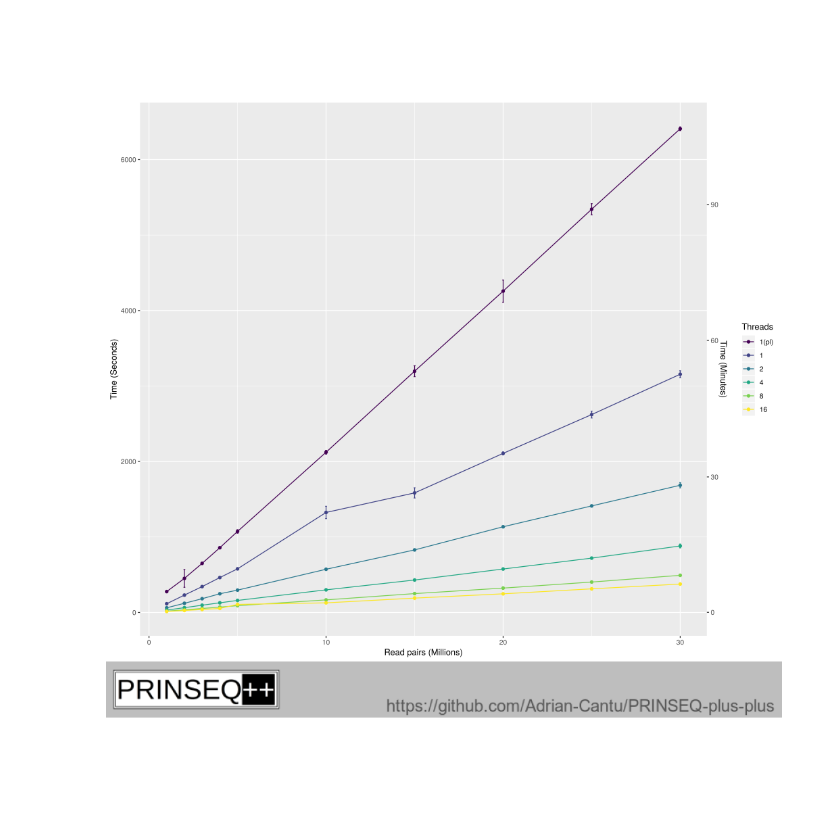

In [6]:
#paste figure and logo
plot_image<- image_read("figure1_temp.png")
final_plot <- image_append(image_scale(c(plot_image, logo), "1000"), stack = TRUE)
plot(final_plot)
image_write(final_plot,"figure1.png")